<a href="https://www.kaggle.com/code/ibrahimawad02/insights-ibrahim-awad?scriptVersionId=139405861" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Hello to the flight predictions notebook 

# Welcome to the flight predictions notebook
- The data is collected from an online flight booking site in India
- It represents the flights going to and from 6 indian cities locally
- It also has the time of the reservation of the ticket and the duartion of the flight from an airport to another
- Finally it contains the class of the flight and the prices of it
***
## Contents
1. analyzing the data and understanding it
2. studying the price data
3. getting insights from questions
> A. What is the biggest airline in the market?<br>
> B. Which airline has the highest flight duration?<br>
> C. Does the duration of flight affects the ticket's price?<br>
> D. Does the number of stops affect the prices?<br>
> E. Does the source city affect the price?<br>
> F. Does the destination city affect the price?<br>
> G. Does the days left before a flight affect the price of a ticket?<br>
> H. Does the departure time affect the price of a ticket?<br>
> I. Does the Arrival time affect the price of a ticket?<br>
> J. What is the ratio of the business class to Economy class?
***
> the insights are presented to you by Ibrahim Hossam

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
#Importing libraries for data visualiztion
import seaborn as sns
import matplotlib.pyplot as plt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the data and understanding it

In [2]:
dfCD = pd.read_csv("/kaggle/input/flight-price-prediction/Clean_Dataset.csv" , sep = "," ,encoding = "utf-8")
dfCD

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


In [3]:
dfCD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [4]:
dfCD.isnull().sum()

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [5]:
dfCD["price"].agg(["min" , 'max' , 'mean' , "std", "median"])

min         1105.000000
max       123071.000000
mean       20889.660523
std        22697.767366
median      7425.000000
Name: price, dtype: float64

- <span style="font-size:20px;"> Since the median is smaller than the mean, the distribution will be right-skewed </span>

<Axes: xlabel='price', ylabel='Density'>

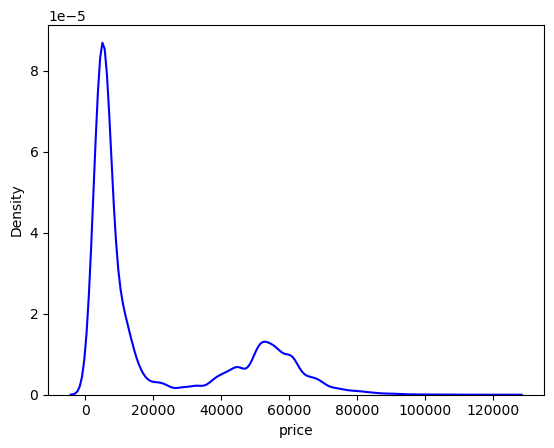

In [6]:
sns.kdeplot(data=dfCD, x="price", color = "blue")

### Let's check if there is an outlier

<Axes: xlabel='price'>

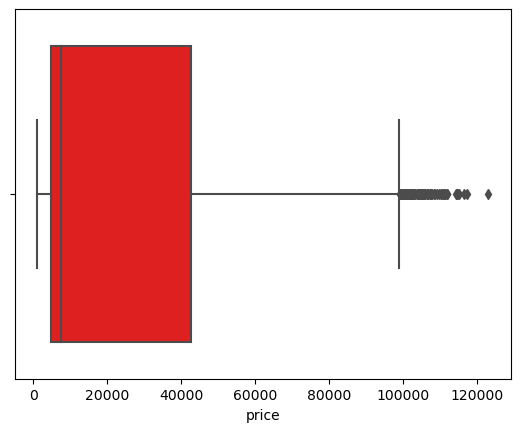

In [7]:
sns.boxplot(data=dfCD, x="price", color = "red")

In [8]:
dfCD.describe(include = "object")

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class
count,300153,300153,300153,300153,300153,300153,300153,300153
unique,6,1561,6,6,3,6,6,2
top,Vistara,UK-706,Delhi,Morning,one,Night,Mumbai,Economy
freq,127859,3235,61343,71146,250863,91538,59097,206666


# Answering questions

### What is the biggest airline in the market?

In [9]:
dfCD.groupby(['airline']).sum().sort_values("price" , ascending= False)

/tmp/ipykernel_20/827468132.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfCD.groupby(['airline']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,duration,days_left,price
airline,,,,
Vistara,22727613408,1703930.16,3310849,3886470735
Air_India,13180955596,1254168.60,2062541,1901529790
Indigo,4747640181,249888.88,1132517,229580207
GO_FIRST,2030668459,202888.42,635645,130973972
AirAsia,1530967642,143943.72,446481,65858089
SpiceJet,827916342,113356.28,217371,55681482


- <span style="font-size:20px;"> It is observed that the biggest airline in the market is Visatra  </span>

In [10]:
dfCD['airline'].value_counts()

Vistara      127859
Air_India     80892
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: airline, dtype: int64

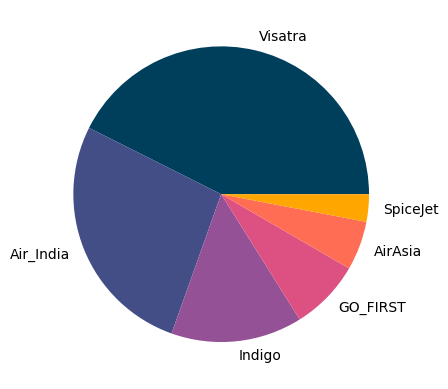

In [11]:
air_labels = 'Visatra', 'Air_India', 'Indigo', 'GO_FIRST', 'AirAsia', 'SpiceJet'
plt.pie(dfCD['airline'].value_counts(), labels = air_labels, colors = ["#003f5c", "#444e86", "#955196", "#dd5182", "#ff6e54", "#ffa600"])
plt.show()

### Which airline has the highest flight duration?
- If they all have the same type of plane we can calculate the most airline with fuel costs

In [12]:
dfCD.groupby(['airline']).sum().sort_values("duration" , ascending= False)

/tmp/ipykernel_20/3924636362.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfCD.groupby(['airline']).sum().sort_values("duration" , ascending= False)


,Unnamed: 0,duration,days_left,price
airline,,,,
Vistara,22727613408,1703930.16,3310849,3886470735
Air_India,13180955596,1254168.60,2062541,1901529790
Indigo,4747640181,249888.88,1132517,229580207
GO_FIRST,2030668459,202888.42,635645,130973972
AirAsia,1530967642,143943.72,446481,65858089
SpiceJet,827916342,113356.28,217371,55681482


/tmp/ipykernel_20/3227491768.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duration = dfCD.groupby(['airline']).sum().sort_values("duration" , ascending= False)


<Axes: xlabel='duration', ylabel='Count'>

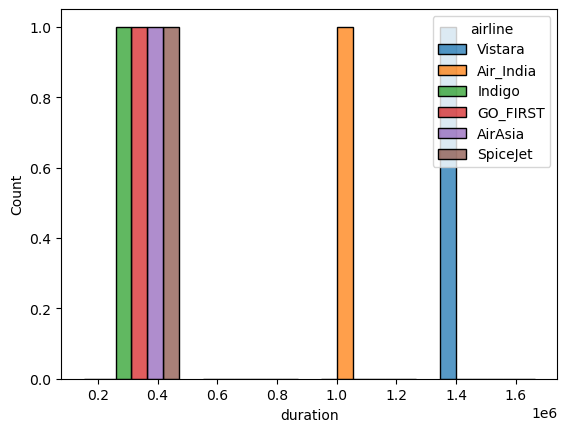

In [13]:
duration = dfCD.groupby(['airline']).sum().sort_values("duration" , ascending= False)
sns.histplot(data=duration, x="duration", multiple = 'dodge', shrink = .8, hue = "airline" )

### Does the duration of flight affects the ticket's price?

In [14]:
duration_price = dfCD.groupby(['duration']).sum().sort_values("price" , ascending= False)
duration_price

/tmp/ipykernel_20/2020601188.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  duration_price = dfCD.groupby(['duration']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,days_left,price
duration,,,
12.42,313305665,46450,56432944
12.00,341272049,58422,55158074
12.08,314665287,46979,52424761
11.17,314429715,53856,49654390
13.00,289801992,41326,47214801
...,...,...,...
37.17,84599,4,13403
39.25,181291,9,13107
40.75,116113,9,11522


<Axes: xlabel='duration', ylabel='price'>

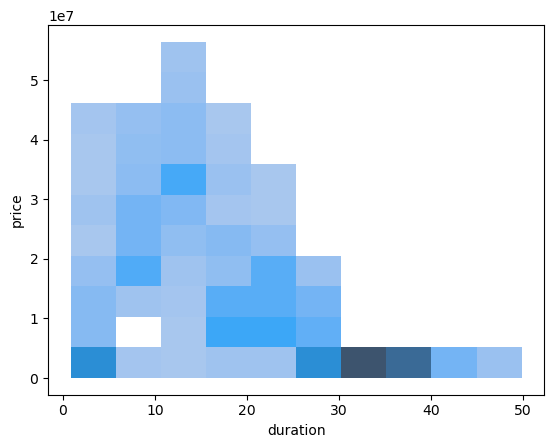

In [15]:
sns.histplot(data=duration_price, x="duration", y = "price")

- <span style="font-size:20px;"> It is observed that the price increases as the duration increases until it reaches 12 hours then the price decreases as the duration increases afterwards </span>

### Does the number of stops affect the prices?

In [16]:
dfCD["stops"].value_counts()

one            250863
zero            36004
two_or_more     13286
Name: stops, dtype: int64

In [17]:
#Changing the stops into numeric values to be easier in analysis
dfCD['stops'].replace("zero" , 0 , inplace = True)
dfCD['stops'].replace("one" , 1 , inplace = True)
dfCD['stops'].replace("two_or_more" , 2 , inplace = True)

In [18]:
dfCD["stops"].value_counts()

1    250863
0     36004
2     13286
Name: stops, dtype: int64

In [19]:
zero_stops = dfCD[dfCD['stops'] == 0]
one_stop = dfCD[dfCD['stops'] == 1]
two_or_more_stops = dfCD[dfCD['stops'] == 2]
print(f"The mean of the price of zero stops tickets is {zero_stops['price'].mean()}\nThe mean of the price of one stop tickets is {one_stop['price'].mean()}\nThe mean of the price of two stops or more tickets is {two_or_more_stops['price'].mean()}")


The mean of the price of zero stops tickets is 9375.938534607265
The mean of the price of one stop tickets is 22900.9924819523
The mean of the price of two stops or more tickets is 14113.450775252146


<Axes: xlabel='price', ylabel='Density'>

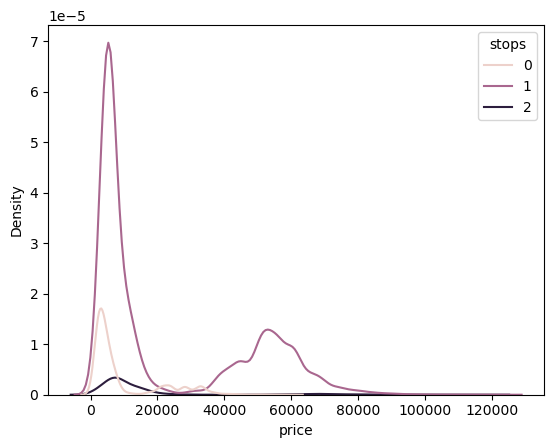

In [20]:
sns.kdeplot(data=dfCD, x="price", hue = "stops")

- <span style="font-size:20px;"> It is observed that the number of stops does not affect the price significintally  </span>

### Does the source city affect the price?

In [21]:
dfCD["source_city"].value_counts()

Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      38700
Name: source_city, dtype: int64

In [22]:
SC_price = dfCD.groupby(['source_city']).sum().sort_values("price" , ascending= False)
SC_price     #SC_price: source city price

/tmp/ipykernel_20/3358383653.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  SC_price = dfCD.groupby(['source_city']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,days_left,price
source_city,,,,,
Mumbai,7272632938,55208,723958.91,1569275,1308278632
Delhi,4878663077,54179,706395.23,1593088,1162531230
Bangalore,7789329150,48384,626252.34,1351264,1117721587
Kolkata,8085851232,44861,614093.03,1205632,1007872785
Chennai,8748304932,36627,496865.48,1009905,851219653
Hyderabad,8270980299,38176,500611.07,1076240,822470388


[None, None, None]

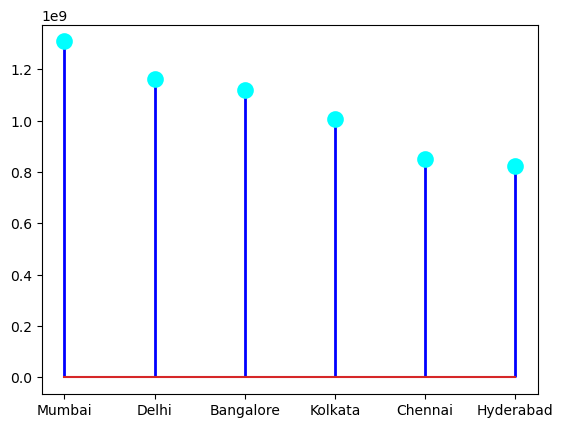

In [23]:
plt.xticks( range(0,6), ['Mumbai', 'Delhi', 'Bangalore', 'Kolkata', 'Chennai', 'Hyderabad'])
(markers, stemlines, baseline) = plt.stem(SC_price["price"])
plt.setp(stemlines, linestyle="-", color="blue", linewidth=2 )
plt.setp(markers, markersize=10, color="cyan", markeredgewidth=2)


- <span style="font-size:20px;">Although, Delhi has more flights getting out of it, it does not have the highest price sum.  </span>
- <span style="font-size:20px;">Therfore, the source city does affect the price.  </span>


### Does the destination city affect the price?

In [24]:
dfCD["destination_city"].value_counts()

Mumbai       59097
Delhi        57360
Bangalore    51068
Kolkata      49534
Hyderabad    42726
Chennai      40368
Name: destination_city, dtype: int64

In [25]:
DC_price = dfCD.groupby(['destination_city']).sum().sort_values("price" , ascending= False)
DC_price     #DC_price: destination city price

/tmp/ipykernel_20/176033794.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DC_price = dfCD.groupby(['destination_city']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,days_left,price
destination_city,,,,,
Mumbai,9111787443,52398,684541.52,1529783,1263052374
Bangalore,7341587699,47864,615779.92,1330249,1102760134
Kolkata,7191172791,48567,654589.46,1282318,1087744724
Delhi,8814219654,48106,603043.44,1501607,1057533005
Chennai,6088730510,39794,538464.73,1050393,886211782
Hyderabad,6498263531,40706,571756.99,1111054,872792256


[None, None, None]

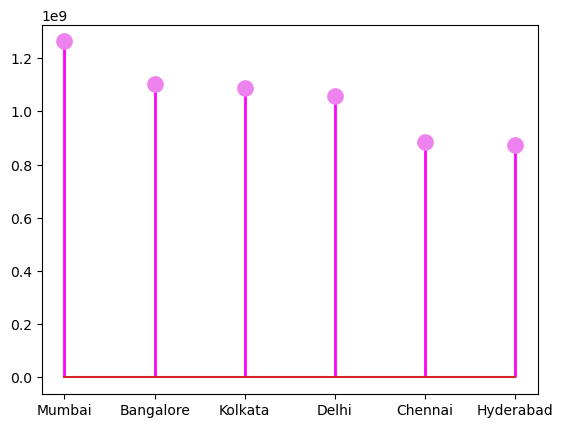

In [26]:
plt.xticks( range(0,6), ['Mumbai', 'Bangalore', 'Kolkata', 'Delhi', 'Chennai', 'Hyderabad'])
(markers, stemlines, baseline) = plt.stem(DC_price["price"])
plt.setp(stemlines, linestyle="-", color="magenta", linewidth=2 )
plt.setp(markers, markersize=10, color="violet", markeredgewidth=2)


- <span style="font-size:20px;">Although, Delhi has more flights getting into it, it does not have the highest price sum.  </span>
- <span style="font-size:20px;">Therfore, the destination city does affect the price.  </span>


### Does the days left before a flight affect the price of a ticket?

In [27]:
dfCD["days_left"].value_counts()

25    6633
18    6602
39    6593
32    6585
26    6573
24    6542
19    6537
31    6534
33    6532
40    6531
41    6525
28    6522
38    6512
20    6502
30    6501
42    6497
22    6494
36    6490
21    6479
37    6476
43    6472
44    6436
17    6419
11    6417
34    6412
13    6404
23    6401
29    6397
12    6381
27    6360
14    6349
15    6340
45    6314
35    6291
16    6272
46    6160
49    6154
48    6078
47    6069
10    5822
8     5767
6     5740
7     5703
9     5665
5     5392
4     5077
3     4248
2     4026
1     1927
Name: days_left, dtype: int64

In [28]:
DL_price = dfCD.groupby(['days_left']).mean().sort_values("price" , ascending= False)
DL_price     #DL_price: days left pricec

/tmp/ipykernel_20/113278465.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DL_price = dfCD.groupby(['days_left']).mean().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,price
days_left,,,,
2,150931.092896,0.939394,14.111080,30211.299801
3,148025.511064,0.946563,14.287476,28976.083569
5,153294.487018,0.925074,12.921970,26679.773368
4,149597.375616,0.931456,13.742667,25730.905653
9,154098.358517,0.932215,12.787071,25726.246072
7,152911.362441,0.933544,12.596291,25588.367351
10,152483.750086,0.932841,12.737475,25572.819134
8,151858.135946,0.918155,12.419870,24895.883995
6,151365.230662,0.920383,12.497056,24856.493902


<Axes: xlabel='days_left', ylabel='price'>

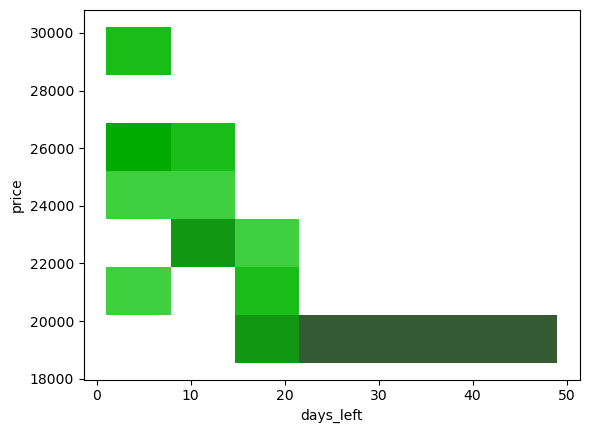

In [29]:
sns.histplot(data=DL_price, x="days_left", y="price", color = "green")


- <span style="font-size:20px;">From the previous graph it is observed that as the days left before a flight increase, the price of the ticket decrease.  </span>


### Does the departure time affect the price of a ticket?

In [30]:
dfCD["departure_time"].value_counts()

Morning          71146
Early_Morning    66790
Evening          65102
Night            48015
Afternoon        47794
Late_Night        1306
Name: departure_time, dtype: int64

- <span style="font-size:17px;"> We can observe that the most traffic time is in the morning </span>

In [31]:
DT_price = dfCD.groupby(['departure_time']).mean().sort_values("price" , ascending= False)
DT_price     #DT_price: departure time price

/tmp/ipykernel_20/1321273630.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DT_price = dfCD.groupby(['departure_time']).mean().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,days_left,price
departure_time,,,,,
Night,167080.148995,0.871249,14.123963,26.129189,23062.146808
Morning,154174.920487,0.961881,11.303808,25.926756,21630.760254
Evening,142902.117861,0.892630,13.642493,25.740945,21232.361894
Early_Morning,148174.591181,0.931861,11.587945,26.088950,20370.676718
Afternoon,140809.774825,0.960121,10.757008,26.170251,18179.203331
Late_Night,95576.095712,0.711332,7.320383,28.466309,9295.299387


<Axes: xlabel='departure_time', ylabel='price'>

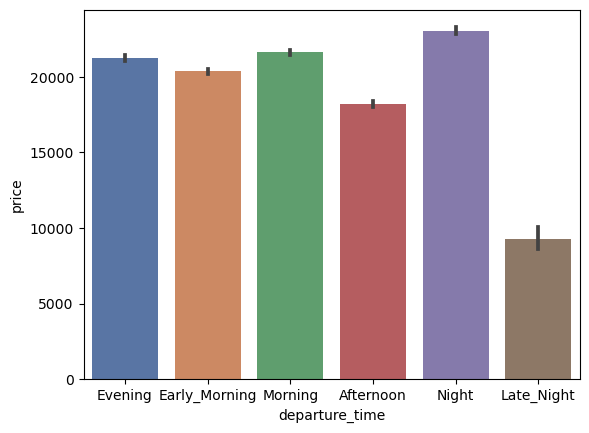

In [32]:
sns.barplot(data = dfCD, x="departure_time", y="price", palette="deep")


- <span style="font-size:20px;">Although Morning has the most departing flights, the night has higher price means .  </span>
- <span style="font-size:20px;">Therfore, the departure time does affect the price.  </span>


### Does the arrival time affect the price of a ticket?

In [33]:
dfCD["arrival_time"].value_counts()

Night            91538
Evening          78323
Morning          62735
Afternoon        38139
Early_Morning    15417
Late_Night       14001
Name: arrival_time, dtype: int64

- <span style="font-size:17px;"> We can observe that the most traffic time is in the night </span>

In [34]:
AT_price = dfCD.groupby(['arrival_time']).mean().sort_values("price" , ascending= False)
AT_price     #AT_price: arrival time price

/tmp/ipykernel_20/2642938998.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  AT_price = dfCD.groupby(['arrival_time']).mean().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,days_left,price
arrival_time,,,,,
Evening,155592.336900,0.971822,12.621578,25.691240,23044.371615
Morning,154177.489583,0.888946,13.940608,25.909285,22231.076098
Night,151785.871999,0.935109,11.521187,25.910715,21586.758341
Afternoon,144598.319699,0.884161,11.393490,25.958940,18494.598993
Early_Morning,131801.993903,0.892392,12.559448,27.182201,14993.139521
Late_Night,124703.693308,0.890936,8.732261,27.629384,11284.906078


<Axes: xlabel='arrival_time', ylabel='price'>

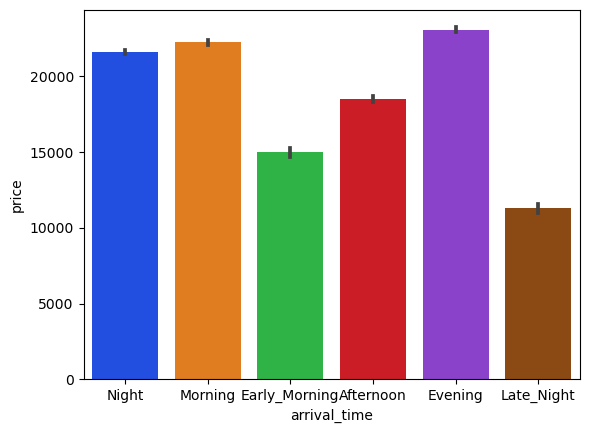

In [35]:
sns.barplot(data = dfCD, x="arrival_time", y="price", palette="bright")


- <span style="font-size:20px;">Although Night has the most arrival flights, the Evening has higher price means .  </span>
- <span style="font-size:20px;">Therfore, the arrival time does affect the price.  </span>


### What is the ratio of Business class to Economy class

In [36]:
dfCD["class"].value_counts()

Economy     206666
Business     93487
Name: class, dtype: int64

- <span style="font-size:20px;"> It is observed that there are more Economy tickets than Business tickets </span>

In [37]:
dfCD.groupby(['class']).sum().sort_values("price" , ascending= False)

/tmp/ipykernel_20/1223034309.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfCD.groupby(['class']).sum().sort_values("price" , ascending= False)


,Unnamed: 0,stops,duration,days_left,price
class,,,,,
Business,23690447183,86468,1281171.45,2406529,4911814564
Economy,21355314445,190967,2387004.61,5398875,1358279711


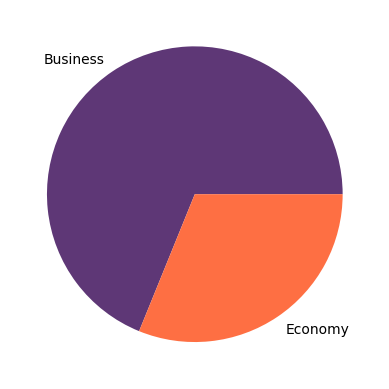

In [38]:
class_labels = "Business", "Economy"
plt.pie(dfCD['class'].value_counts(), labels = class_labels, colors = ["#5e3776", "#fe6f43"])
plt.show()

# **Thanks for reading**